In [2]:
! pip install pandas requests pyarrow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 MB 9.2 MB/s eta 0:00:0000:0100:01m


In [3]:
import pandas as pd
import requests

In [4]:
API_URL = "HTTPS://db.ygoprodeck.com/api/v7/cardinfo.php"

In [5]:
# Make a request to the API
response = requests.get(API_URL)
if response.status_code == 200:
    # Parse the JSON response
    data = response.json()
    
    # Convert the data to a DataFrame
    df = pd.DataFrame(data['data'])
    
    # Save the DataFrame to a Parquet file
    

In [6]:
df

,id,name,type,humanReadableCardType,frameType,desc,race,archetype,ygoprodeck_url,card_sets,...,atk,def,level,attribute,linkval,linkmarkers,pend_desc,monster_desc,scale,banlist_info
0,34541863,"""A"" Cell Breeding Device",Spell Card,Continuous Spell,spell,"During each of your Standby Phases, put 1 A-Co...",Continuous,Alien,https://ygoprodeck.com/card/a-cell-breeding-de...,"[{'set_name': 'Force of the Breaker', 'set_cod...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,64163367,"""A"" Cell Incubator",Spell Card,Continuous Spell,spell,Each time an A-Counter(s) is removed from play...,Continuous,Alien,https://ygoprodeck.com/card/a-cell-incubator-8856,"[{'set_name': 'Gladiator's Assault', 'set_code...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,91231901,"""A"" Cell Recombination Device",Spell Card,Quick-Play Spell,spell,Target 1 face-up monster on the field; send 1 ...,Quick-Play,Alien,https://ygoprodeck.com/card/a-cell-recombinati...,"[{'set_name': 'Invasion: Vengeance', 'set_code...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,73262676,"""A"" Cell Scatter Burst",Spell Card,Quick-Play Spell,spell,"Select 1 face-up ""Alien"" monster you control. ...",Quick-Play,Alien,https://ygoprodeck.com/card/a-cell-scatter-bur...,"[{'set_name': 'Strike of Neos', 'set_code': 'S...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,80181649,"""Case of K9""",Spell Card,Continuous Spell,spell,"When this card is activated: You can add 1 ""K9...",Continuous,K9,https://ygoprodeck.com/card/case-of-k9-14990,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13711,2648201,ZW - Sleipnir Mail,Effect Monster,Effect Monster,effect,"You can target 1 ""Utopia"" monster you control;...",Beast,Utopia,https://ygoprodeck.com/card/zw-sleipnir-mail-239,"[{'set_name': 'Primal Origin', 'set_code': 'PR...",...,1000.0,1000.0,4.0,LIGHT,NaN,NaN,NaN,NaN,NaN,NaN
13712,95886782,ZW - Sylphid Wing,Effect Monster,Effect Monster,effect,"You can only control 1 ""ZW - Sylphid Wing"". Yo...",Beast,Zexal,https://ygoprodeck.com/card/zw-sylphid-wing-12286,"[{'set_name': 'Brothers of Legend', 'set_code'...",...,800.0,1600.0,4.0,LIGHT,NaN,NaN,NaN,NaN,NaN,NaN
13713,81471108,ZW - Tornado Bringer,Effect Monster,Effect Monster,effect,"You can target 1 ""Utopia"" monster you control;...",Dragon,Utopia,https://ygoprodeck.com/card/zw-tornado-bringer...,"[{'set_name': 'Cosmo Blazer', 'set_code': 'CBL...",...,1300.0,1800.0,5.0,WIND,NaN,NaN,NaN,NaN,NaN,NaN
13714,18865703,ZW - Ultimate Shield,Effect Monster,Effect Monster,effect,When this card is Normal or Special Summoned: ...,Aqua,Utopia,https://ygoprodeck.com/card/zw-ultimate-shield...,"[{'set_name': 'Cosmo Blazer', 'set_code': 'CBL...",...,0.0,2000.0,4.0,EARTH,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.columns

Index(['id', 'name', 'type', 'humanReadableCardType', 'frameType', 'desc',
       'race', 'archetype', 'ygoprodeck_url', 'card_sets', 'card_images',
       'card_prices', 'typeline', 'atk', 'def', 'level', 'attribute',
       'linkval', 'linkmarkers', 'pend_desc', 'monster_desc', 'scale',
       'banlist_info'],
      dtype='object')

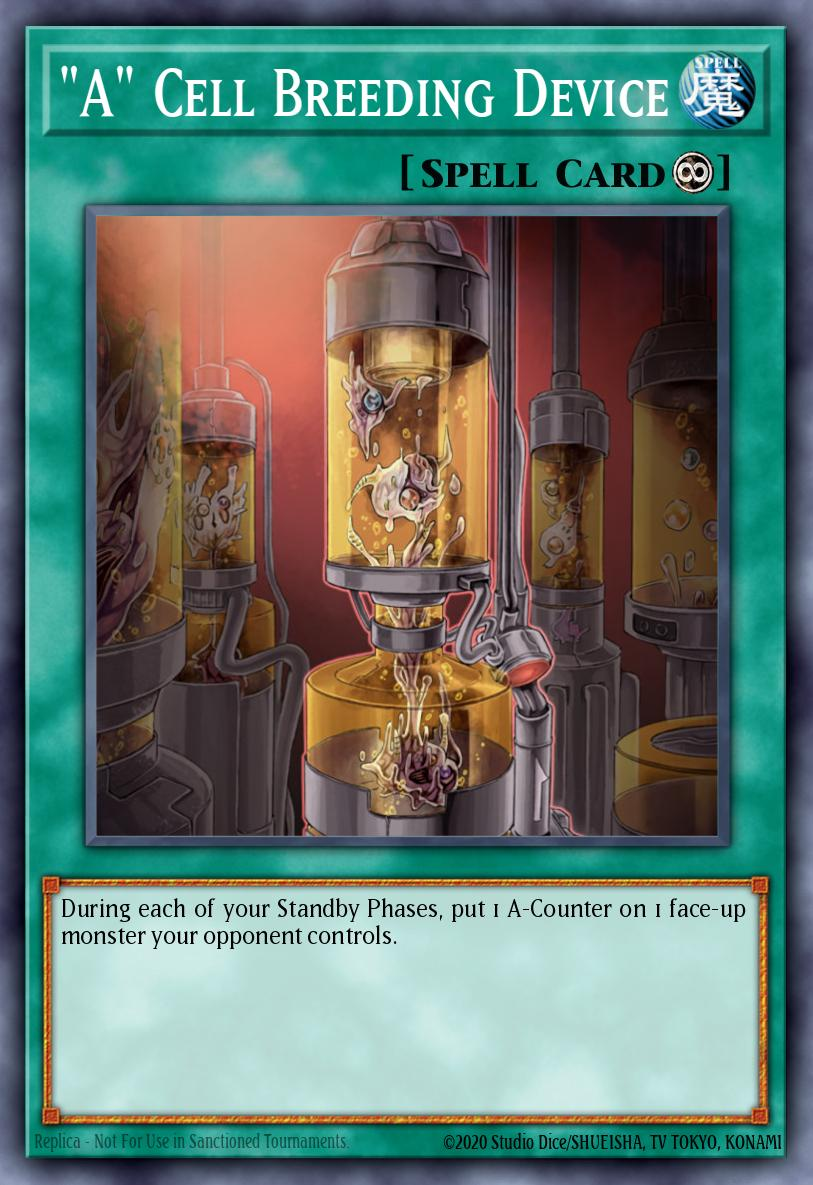

In [17]:
# render the image at thi url
from IPython.display import Image
response = requests.get(df.loc[0, "card_images"][0]["image_url"])
Image(response.content)

In [23]:
df.to_parquet('work/data/yugioh_cards.parquet', index=False)